In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
np.set_printoptions(precision=2)
pd.set_option("display.precision", 2)
%matplotlib inline

# 1a
## GBM function that takes the following parameters:
### n := number of paths to be simulated
### m := number of discritization points per path
### S0 := initial starting point
$$ \frac{dS}{S} = \mu dt + \sigma dW $$

In [85]:
def GBM(n,m,S0,mu,sigma,dt):
    np.random.seed(999)
    arr = np.zeros((n , m))
    for i in range(n):
        for j in range(m):
            arr[i,j] = S0 * np.exp( (mu - (sigma ** 2)/2) * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1))
    return arr

# 1b
## Calculate Call option using Black-Scholes Formula

In [86]:
####### do not change these values #########
S0 = 50
K = 50
r = 0.05
sigma = 0.3
T = 0.5
######################################

d1 = (np.log(S0/K) + (r + (sigma**2)/2) * T) / (np.sqrt(T) * sigma)
d2 = (np.log(S0/K) + (r - (sigma**2)/2) * T) / (np.sqrt(T) * sigma)
C = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
print(f" d1 =  {round(d1,4)} | N(d1) = {round(norm.cdf(d1), 4)} | d2 = {round(d2, 4)} | N(d2) = {round(norm.cdf(d2), 4)} | C = {round(C, 4)}")

 d1 =  0.2239 | N(d1) = 0.5886 | d2 = 0.0118 | N(d2) = 0.5047 | C = 4.8174


# 1c
## compute call option price using monte carlo simulation
## using $$ S_T = S_0 e^{(r-\frac{\sigma^2}{2})T+\sigma\epsilon\sqrt{T}}$$
## by using the GBM function in part (a1) for n=1000

In [87]:
S0 = 50
K = 50
r = 0.05
sigma = 0.3
T = 0.5

######################################
x = GBM(1000, 1, S0, r , sigma, T)
S_T = x[-1]
y = []
for i in x:
    if i - K > 0:
        y.append(i-K)
    else:
        y.append(0)

sd  = np.std(y) 

C = np.mean(y)
print(f" C = {C} | CIL = {C - norm.ppf(0.975) * sd / np.sqrt(1000)} | CIU = {C + norm.ppf(0.975) * sd / np.sqrt(1000)} ")

 C = [4.95] | CIL = [4.47] | CIU = [5.43] 


## We will see how the average of MC simulations will get closer and closer to the expectation of the ABM as we increase the number of simulations, the solution for ABM is:
$$S = S0 + \mu * t + \sigma W_t$$
$$E[S] = S0 + \mu * t$$

# 2a Create ABM function

In [88]:
def ABM(n,m,S0,mu,sigma,dt):
    np.random.seed(999)
    arr = np.zeros((n , m))
    arr[:, 0] = S0
    for i in range(n):
        for j in range(m-1):
            arr[i,j+1] = float(arr[i,j])  + mu * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1)
    return arr

# 2b
## plot the mean path of all ABM generated for ABM(n=100,m=20,S0=10,mu=0,sigma=1,dt=1)
## i.e get the mean across all paths for each time step 

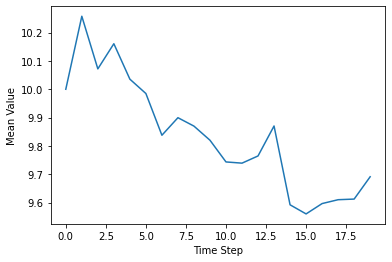

In [89]:
x = ABM(100, 20, 10, 0, 1, 1)

y = []
for i in range(20):
    y.append(x[:, i].mean())

plt.ylabel("Mean Value")
plt.xlabel("Time Step")
plt.plot(range(20), y)

# 2c
## plot the mean path of all ABM generated for ABM(n=1000,m=20,S0=10,mu=0,sigma=1,dt=1)
## i.e get the mean across all paths for each time step 

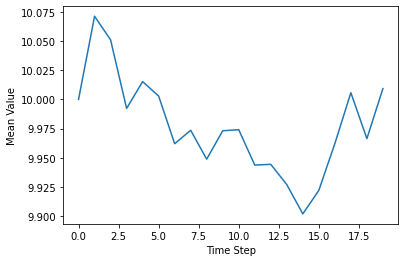

In [90]:
x = ABM(1000, 20, 10, 0, 1, 1)

y = []
for i in range(20):
    y.append(x[:, i].mean())

plt.ylabel("Mean Value")
plt.xlabel("Time Step")
plt.plot(range(20), y)

# 2d
## plot the mean path of all ABM generated for ABM(n=100000,m=20,S0=10,mu=0,sigma=1,dt=1)
## .e get the mean across all paths for each time step 

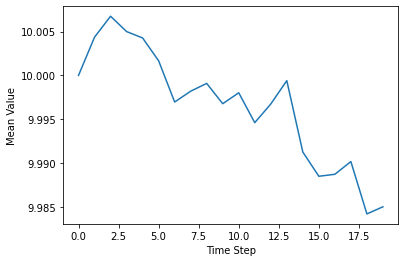

In [91]:
x = ABM(100000, 20, 10, 0, 1, 1)

y = []
for i in range(20):
    y.append(x[:, i].mean())

plt.ylabel("Mean Value")
plt.xlabel("Time Step")
plt.plot(range(20), y)

## As we increase "n"

As the number of paths to be simulated (n) increases, the values depicted for the mean stay much closer to the mean of 10. Most noticable at the y axis where we see a significant reduciton in the amount of spread of [10.2, 9.6] at 100 paths to [10.005, 9.985] at 100000 simulations.

# repeat Q2 with ABM(n=?,m=20,S0=10,mu=0.03,sigma=1,dt=1)

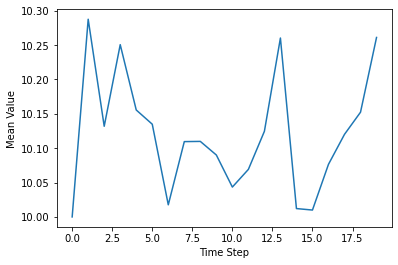

In [92]:
x = ABM(100, 20, 10, 0.03, 1, 1)

y = []
for i in range(20):
    y.append(x[:, i].mean())

plt.ylabel("Mean Value")
plt.xlabel("Time Step")
plt.plot(range(20), y)

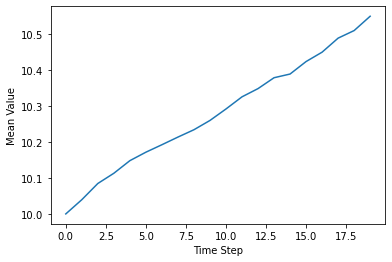

In [93]:
x = ABM(10000, 20, 10, 0.03, 1, 1)

y = []
for i in range(20):
    y.append(x[:, i].mean())

plt.ylabel("Mean Value")
plt.xlabel("Time Step")
plt.plot(range(20), y)

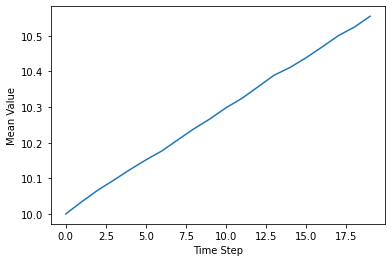

In [94]:
x = ABM(100000, 20, 10, 0.03, 1, 1)

y = []
for i in range(20):
    y.append(x[:, i].mean())

plt.ylabel("Mean Value")
plt.xlabel("Time Step")
plt.plot(range(20), y)

# As we increase "n"

As the value n increases, with the addition of a steady increase (mu), we can see that the graphs also show a steady growth in its value. 

# 3
## Using more Currency Data to find the Value at Risk (VaR) and Expected Shortfall

In [1]:
#create a dataframe by importing the csv file through "pd" or "pandas" library
df = pd.read_csv("Index Data.csv")


print(df.head())
### notice the columns names in the dataframe

NameError: name 'pd' is not defined

In [96]:
#use currency columns and change the required indeces into the requided currency dominations
df["DJIA"] = df.iloc[2:, 3]
df['FTSE'] = pd.to_numeric(df.iloc[2 :, 5], downcast="float") * pd.to_numeric(df.iloc[2 :, 6], downcast='float')
df['CAC40'] = pd.to_numeric(df.iloc[2 :, 9], downcast="float") / pd.to_numeric(df.iloc[2 :, 10], downcast='float')
df['Nikkei'] = pd.to_numeric(df.iloc[2 :, 13], downcast="float") / pd.to_numeric(df.iloc[2 :, 14], downcast='float')

print(df.head())
print(df.tail())

  Unnamed: 0 Unnamed: 1  Unnamed: 2 Unnamed: 3  Unnamed: 4 Unnamed: 5  \
0        NaN        NaN         NaN       DJIA         NaN   FTSE-100   
1        Day        NaN         NaN        NaN         NaN        NaN   
2          0  07-Aug-06         NaN   11219.38         NaN     5828.8   
3          1  08-Aug-06         NaN   11173.59         NaN     5818.1   
4          2  09-Aug-06         NaN   11076.18         NaN     5860.5   

  Exch Rate  Adjusted  Unnamed: 8 Unnamed: 9 Exch Rate.1 Adjusted.1  \
0   USD/GBP  FTSE-500         NaN     CAC-40     EUR/USD     CAC-40   
1       NaN       NaN         NaN        NaN         NaN        NaN   
2    1.9098       NaN         NaN    4956.34      0.7776        NaN   
3    1.9072       NaN         NaN    4967.95      0.7789        NaN   
4    1.9086       NaN         NaN    5025.15      0.7762        NaN   

   Unnamed: 12 Unnamed: 13 Exch Rate.2 Adjusted.2      DJIA      FTSE  \
0          NaN      Nikkei     YEN/USD     Nikkei       NaN  

In [97]:
#drop currency columns "USDGBP", "EURUSD", "YENUSD"
df = df.iloc[2 :, [16, 17,18,19]]
df = df.rename(index = lambda x: x - 2 )
print(df.head())
print(df.tail())

       DJIA      FTSE    CAC40  Nikkei
0  11219.38  11131.84  6373.89  131.77
1  11173.59  11096.28  6378.16  134.38
2  11076.18  11185.35  6474.04  135.94
3  11124.37  11016.71  6357.49  135.44
4  11088.02  11040.73  6364.76  134.10
         DJIA     FTSE    CAC40  Nikkei
496  11019.69  8878.18  5689.85  109.55
497  11388.44  9734.02  6230.01  111.62
498  11015.69  9656.26  6181.95  113.23
499  10825.17  9438.58  6033.93  114.26
500  11022.06  9599.90  6200.40  112.82


In [98]:
# create new empty dataframe for scenarios
df1 = pd.DataFrame(columns = ["DJIA", "FTSE", "CAC40", "Nikkei"])
# add a column for each index with the generated scenarios 
# 4 columns are needed

for i in df.columns:
    x = []
    for j in range(500):
        x.append( float(df.loc[j + 1, i]) / float(df.loc[j, i]) * float(df.loc[500, i]))
    df1[i] = x

# create portfolio value column call it PV, we have portfolio investment variables.
# use the variables and do not change them
DJIA      = 4000
FTSE      = 3000
CAC40     = 1000
Nikkei225 = 2000

a = []
for i in range(500):
     a.append(float(df1.loc[i, "DJIA"]) * DJIA / float(df.loc[500, "DJIA"]) + float(df1.loc[i, "FTSE"]) * FTSE / float(df.loc[500, "FTSE"]) + float(df1.loc[i, "CAC40"]) * CAC40 / float(df.loc[500, "CAC40"]) + float(df1.loc[i, "Nikkei"]) * Nikkei225 / float(df.loc[500, "Nikkei"]))

df1["PV"] = a
df1['Loss'] = 10000 - df1["PV"] 

print(df1.head())
print(df1.tail())

       DJIA     FTSE    CAC40  Nikkei        PV   Loss
0  10977.08  9569.23  6204.55  115.05  10014.33 -14.33
1  10925.97  9676.96  6293.60  114.13  10027.48 -27.48
2  11070.01  9455.16  6088.77  112.40   9946.74  53.26
3  10986.04  9620.83  6207.49  111.71   9974.86  25.14
4  11031.85  9659.70  6265.57  114.56  10063.64 -63.64
         DJIA      FTSE    CAC40  Nikkei        PV    Loss
495  11448.03   9662.99  6214.28  110.18  10129.78 -129.78
496  11390.89  10525.30  6789.02  114.96  10555.80 -555.80
497  10661.30   9523.21  6152.57  114.45   9866.26  133.74
498  10831.43   9383.49  6051.94  113.85   9857.46  142.54
499  11222.53   9763.97  6371.45  111.40  10126.44 -126.44


In [99]:
# sort Losses in descending order and save them into new variable
sorted_losses = df1.sort_values(by=['Loss'],ascending=False)["Loss"]


print(sorted_losses.head(10))


493    477.84
338    345.43
348    282.20
328    277.04
486    253.38
226    217.97
130    202.26
237    201.39
472    191.27
305    191.05
Name: Loss, dtype: float64


In [100]:
# return the 99% VAR
#VAR is located at what index in the sorted_losses array 
# remember sorted_losses are sorted in descending order!
var_index = 486
VAR1 = sorted_losses[var_index]
ES1  = np.mean(sorted_losses[:5])
print('VAR1 = %.2f' % VAR1)
print('ES1  = %.2f' % ES1)

##### do not modifiy below
##### modified tail
sorted_losses_new = sorted_losses.copy()
sorted_losses_new[:4] = sorted_losses[:4] + 15

VAR1 = 253.38
ES1  = 327.18


In [101]:
# calculate the new VAR and ES associated with "sorted_losses_new" case
VAR2 = sorted_losses_new[var_index]
ES2  = np.mean(sorted_losses_new[:5])
print('VAR2 = %.2f' % VAR2)
print('ES2  = %.2f' % ES2)

VAR2 = 253.38
ES2  = 339.18


## Compare VAR1 and VAR2, ES1 and ES2
## Does VAR alone give good estimate of risk ?
## Why is ES2 different from ES1 ?
## What is the interpetation of ES?

VAR alone is an efficient way of approximating the risk of market variables a financial institution is exposed to. By taking into account the various variables we can give an approximation for "how bad things can get?" with a certain confidence level. It doesn't however extend that quesiton further to "If things to do go bad, how bad will they be?" therefore in conjunction with the ES we can give an even better estimate of risk by accounting for larger losses.

ES2 is different from ES1 because of the addition of 15 in the top 4 sorted losses. As we take the average of the top 1% of the 500 losses, ES2 is greater.

ES gives us a representation of "If things do get bad, how much can the company expect to lose?" The ES takes the VaR, and adds into account that potential losses can be larger then depicted in the VaR.